# Project 4: Predict Dengue Cases

**Notebook 2 - EDA (Exploratory Data Analysis)**<br>
[Imports](#Imports)<br>
[Summary Statistics](#Summary-Statistics)<br>
[Pairplots](#Pairplots)<br>
[Dengue Incidence Trends](#Dengue-Incidence-Trends)<br>
[Google Search Trends](#Google-Search-Trends)
[Weather Trends](#Weather-Trends)<br>
[Dengue Correlations](#Dengue-Correlations)<br>

## Imports

### Import libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
import calendar

import pickle
import compiled_functions

### Import data

In [2]:
# Import data
dengue_wk = pickle.load(open('../pkls/dengue_wk.pkl', 'rb'))

In [3]:
# Initial view
compiled_functions.shape_head(dengue_wk, "dengue_wk")

dengue_wk dataset shape:
(574, 15)

dengue_wk dataset head:


df  dhf  dengue_cases  daily_rainf_total  highest_30min_rainf  \
2012-01-01  74.0  0.0          74.0           0.600000             0.600000   
2012-01-08  64.0  2.0          66.0           4.000000             1.468296   
2012-01-15  60.0  1.0          61.0           3.685714             0.808308   
2012-01-22  50.0  2.0          52.0           4.000000             2.701471   
2012-01-29  84.0  1.0          85.0           1.228571             0.871997   

            highest_60min_rainf  highest_120min_rainf  mean_temp   max_temp  \
2012-01-01             0.600000              0.600000  27.200000  31.400000   
2012-01-08             1.468296              1.776585  26.971429  30.542857   
2012-01-15             1.158314              1.754746  26.228571  29.500000   
2012-01-22             3.206600              3.225174  26.914286  31.300000   
2012-01-29             0.916665              0.962512  26.600000  30.600000   

             min_temp  mean_wind_speed  max_wind_speed  dengue_searches  \
2012-01-01  25.200000         8.400000       28.400000                7   
2012-01-08  24.785714        12.214286       34.600000                5   
2012-01-15  23.828571         7.814286       34.214286                8   
2012-01-22  24.471429         7.357143       28.042857                6   
2012-01-29  24.400000         8.585714       30.857143                6   

            dengue_fever_searches  dengue_symptoms_searches  
2012-01-01                      5                         2  
2012-01-08                      5                         0  
2012-01-15                      4                         2  
2012-01-22                      7                         3  
2012-01-29                      3                         0

In [4]:
# Initial check
dengue_wk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 574 entries, 2012-01-01 to 2022-12-25
Freq: W-SUN
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   df                        574 non-null    float64
 1   dhf                       574 non-null    float64
 2   dengue_cases              574 non-null    float64
 3   daily_rainf_total         574 non-null    float64
 4   highest_30min_rainf       574 non-null    float64
 5   highest_60min_rainf       574 non-null    float64
 6   highest_120min_rainf      574 non-null    float64
 7   mean_temp                 574 non-null    float64
 8   max_temp                  574 non-null    float64
 9   min_temp                  574 non-null    float64
 10  mean_wind_speed           574 non-null    float64
 11  max_wind_speed            574 non-null    float64
 12  dengue_searches           574 non-null    int32  
 13  dengue_fever_searches     574 non-

# EDA

## Summary Statistics

In [5]:
dengue_wk.describe().T

count        mean         std        min        25%  \
df                        574.0  285.398084  295.705909  24.000000  81.000000   
dhf                       574.0    0.740418    1.079576   0.000000   0.000000   
dengue_cases              574.0  286.138502  296.094306  24.000000  81.000000   
daily_rainf_total         574.0    5.398681    5.860401   0.000000   1.178571   
highest_30min_rainf       574.0    2.804283    2.688296   0.000000   0.720240   
highest_60min_rainf       574.0    3.505452    3.423063   0.000000   0.885714   
highest_120min_rainf      574.0    4.055003    4.003083   0.000000   1.004267   
mean_temp                 574.0   27.967173    0.869499  24.500000  27.403571   
max_temp                  574.0   31.628148    1.001402  26.700000  31.057143   
min_temp                  574.0   25.382977    0.876549  22.785714  24.746429   
mean_wind_speed           574.0    8.677963    2.360193   5.114286   6.842857   
max_wind_speed            574.0   32.553644    3.290422  22.757143  30.157143   
dengue_searches           574.0   19.588850   16.625795   3.000000  10.000000   
dengue_fever_searches     574.0    5.101045    3.676286   0.000000   3.000000   
dengue_symptoms_searches  574.0    4.306620    4.002625   0.000000   2.000000   

                                 50%         75%          max  
df                        207.000000  372.000000  1791.000000  
dhf                         0.000000    1.000000     8.000000  
dengue_cases              208.750000  373.750000  1792.000000  
daily_rainf_total           4.042857    7.250000    50.542857  
highest_30min_rainf         2.170713    3.993557    15.857143  
highest_60min_rainf         2.742857    4.875955    18.685714  
highest_120min_rainf        3.085344    5.478571    22.514286  
mean_temp                  27.971429   28.528571    30.028571  
max_temp                   31.657143   32.282143    33.942857  
min_temp                   25.328571   25.925000    27.814286  
mean_wind_speed             8.078571   10.225000    16.257143  
max_wind_speed             32.285714   34.735714    42.485714  
dengue_searches            13.000000   22.750000   100.000000  
dengue_fever_searches       4.000000    6.000000    41.000000  
dengue_symptoms_searches    3.000000    5.000000    28.000000

**Descriptive statistics observations**

1) Total number of dengue cases
   - large variation (std 296 vs mean of 286) driven by dengue fever cases
   - max no. of cases also falls well beyond 1.5 x interquartile range (IQR) indicating outliers, seasonal trends, or spikes
2) Rainfall (total daily, max 30min, max 60min, max 120min)
   - large variation for all of these numbers with max values falling well beyond 1.5 x IQR indicating outliers, seasonal trends, or spikes
3) Temperature (mean, max, min)
   - less variation in these numbers, as expected
4) Wind speeds (mean, max)
   - Less variation in mean wind speeds, more variation in max wind speeds with some outliers in max wind speeds
5) Dengue searches
   - large variation in searches with max numbers falling well beyond 1.5 x IQR indicating outliers
   - this may be mirroring dengue cases (to explore more)


## Pairplots
*To get quick overview of distributions and relationships*

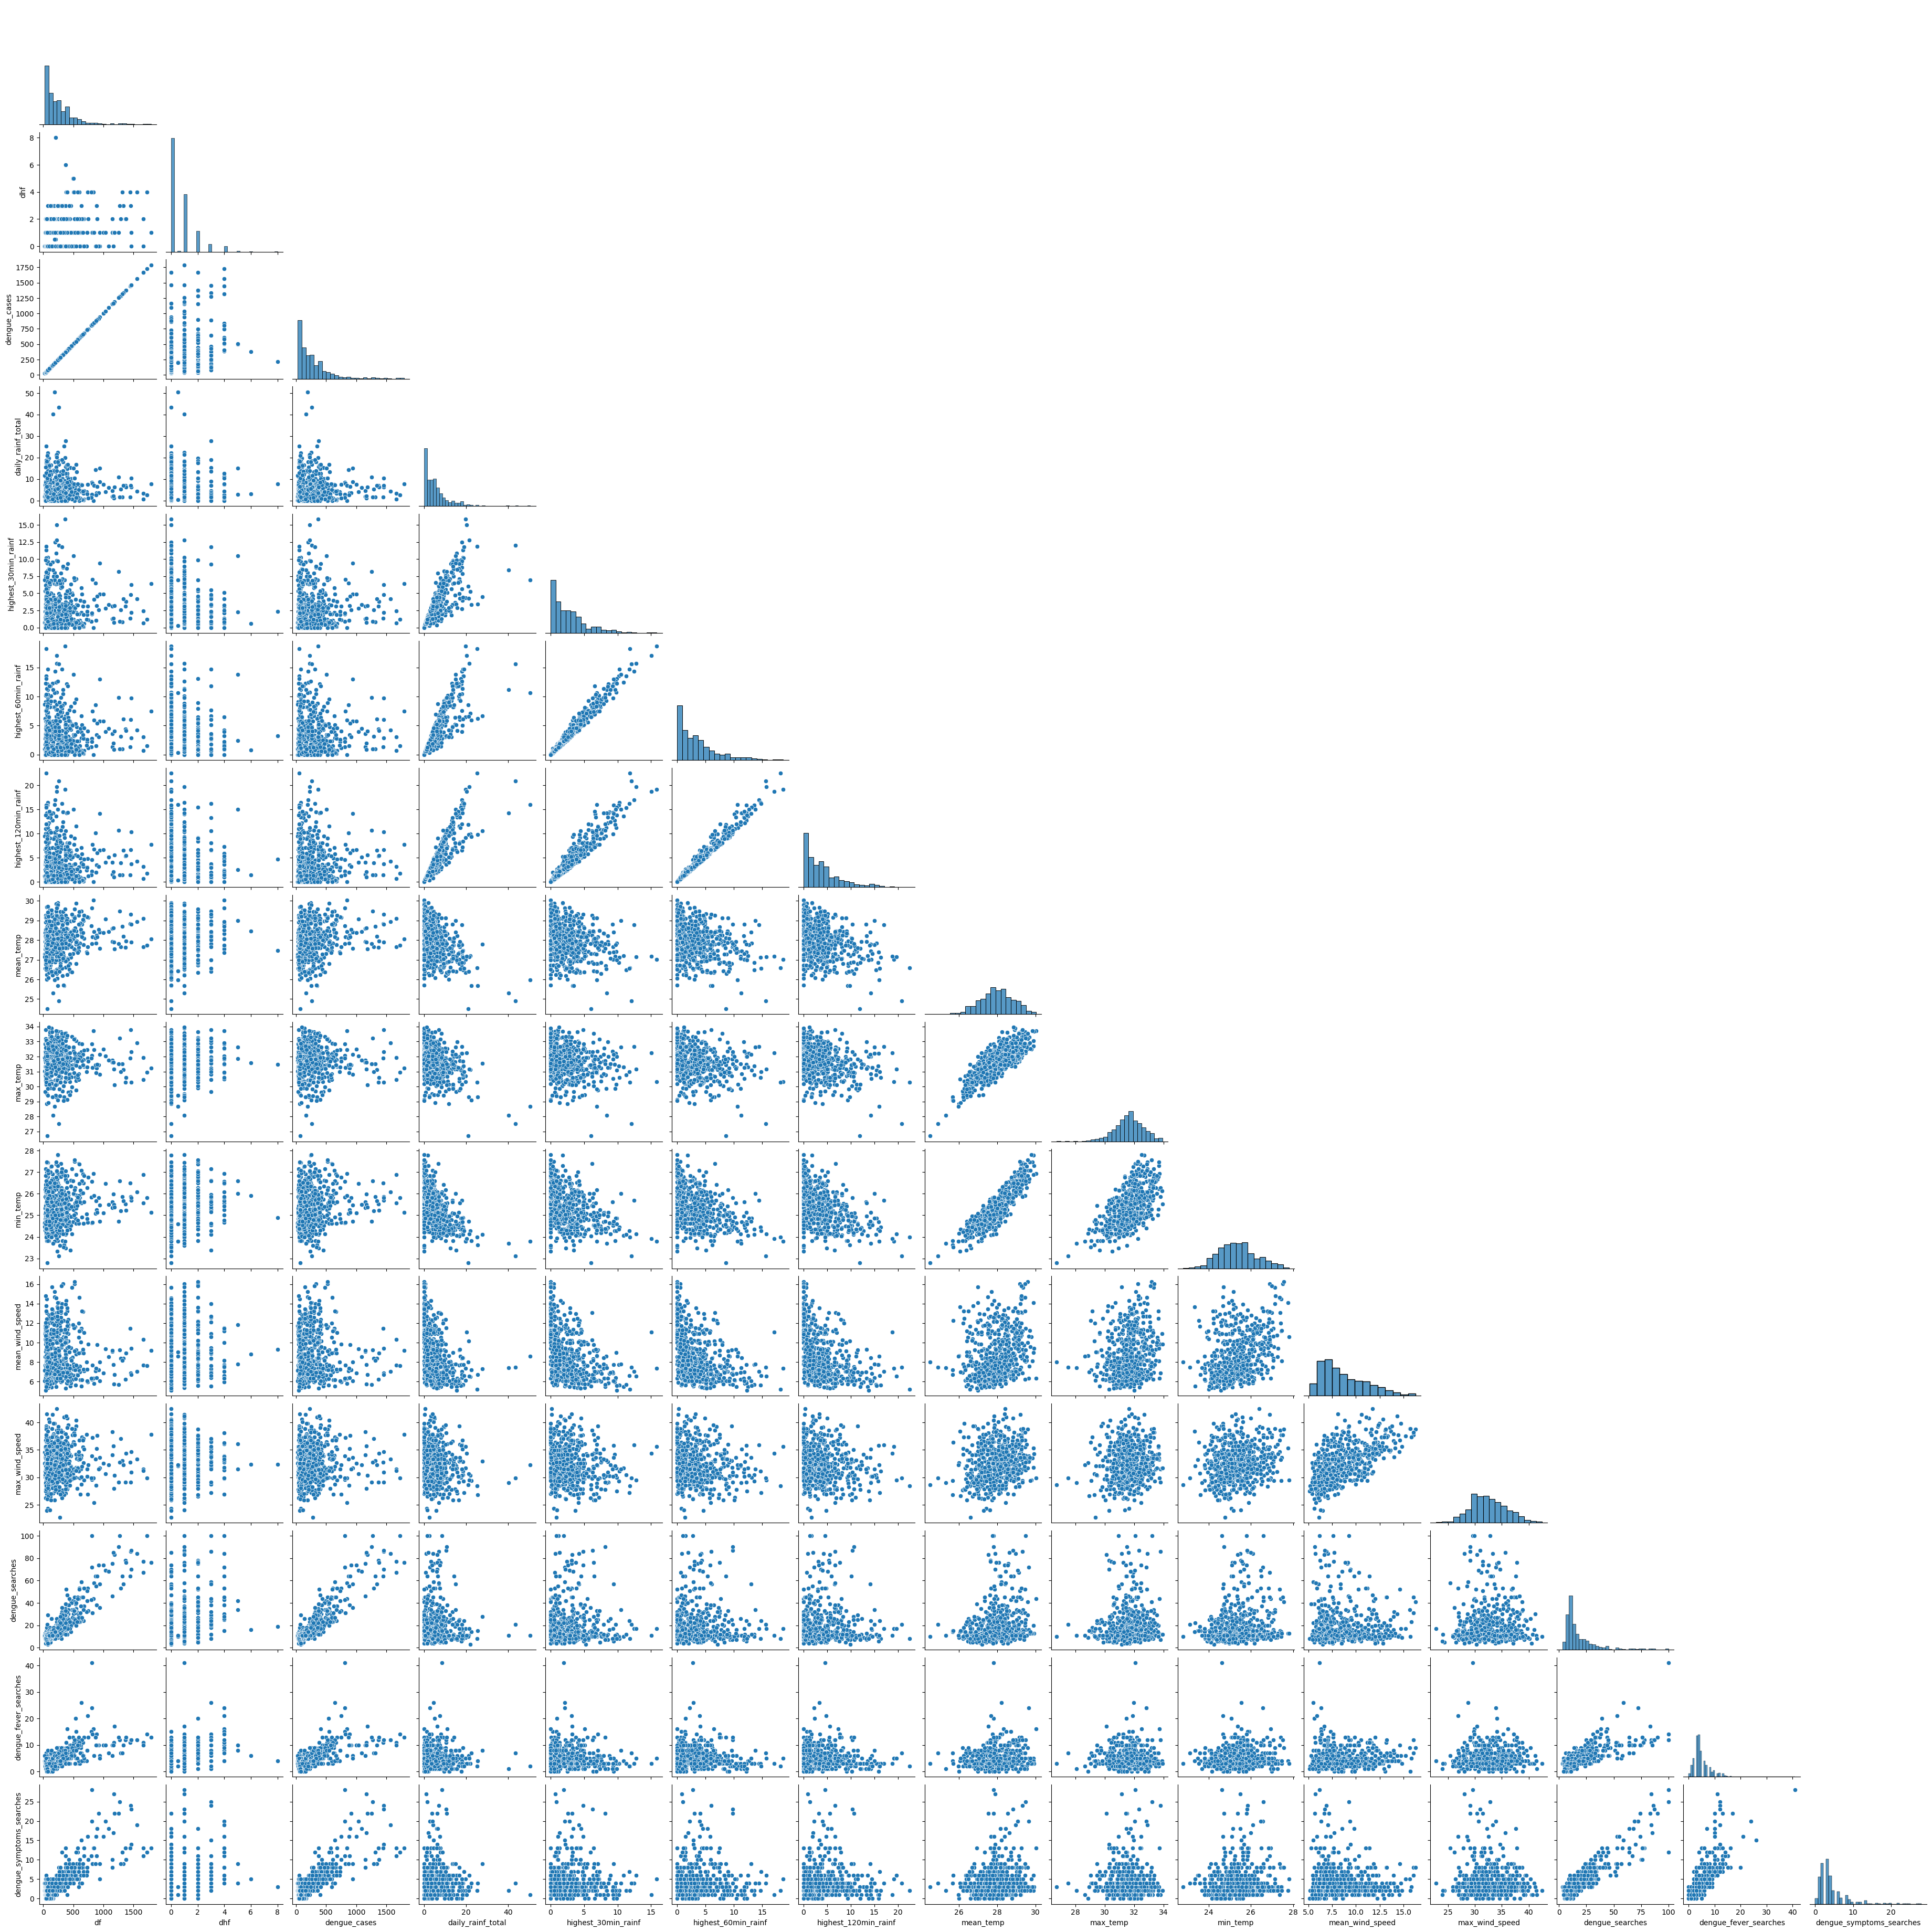

In [6]:
sns.pairplot(dengue_wk, corner=True);

**Pairplot observations**
1) Histograms for most features are right-skewed indicating outliers on the high side (per observations on descriptive stats), with the exception of:
   - max wind speed, mean/min temp which are centrally located
   - max temp which is left-skewed (indicating outliers on the low side)
2) Total number of dengue cases is linear to number of DF cases, but not number of DHF cases.
   - Interestingly, the max number of DHF cases did not occur in years with high number of total dengue cases, indicating factors other than total dengue cases driving DHF.
3) Total number of dengue cases vs rainfall, temperature and windspeeds
   - relationships are more obvious with the weekly mean of the daily means with notable gaps in certain quadrants of the pairplots
   - we do not see high dengue cases when mean daily rainfall exceeds ~20mm
   - we do not see high dengue cases when mean daily temperature falls below ~27 degrees celsius
   - we do not see high dengue cases when mean wind speeds exceeds ~12km/h
4) Total number of dengue cases vs google searches
   - the most linear relationship is with the general dengue searches rather than specific "dengue fever" or "dengue symptoms" searches
   - the higher the dengue cases, the higher the google search numbers for "dengue" (as expected)
5) Correlations between weather metrics
   - as expected, there are significant linear correlations between weather metrics
   - firstly, due to the nature of the relationships between mean/max/mean, there are linear correlations between rainfall mean and max 30min/60min/120min; between mean temp and min/max temp; and between mean and max windspeeds.
   - secondly, with increasing rainfall, we see a reduction in temperature and slight reduction in wind speeds

**To replot the above observations below, in a more focused manner**

### Relationships between DF, DHF and total dengue cases

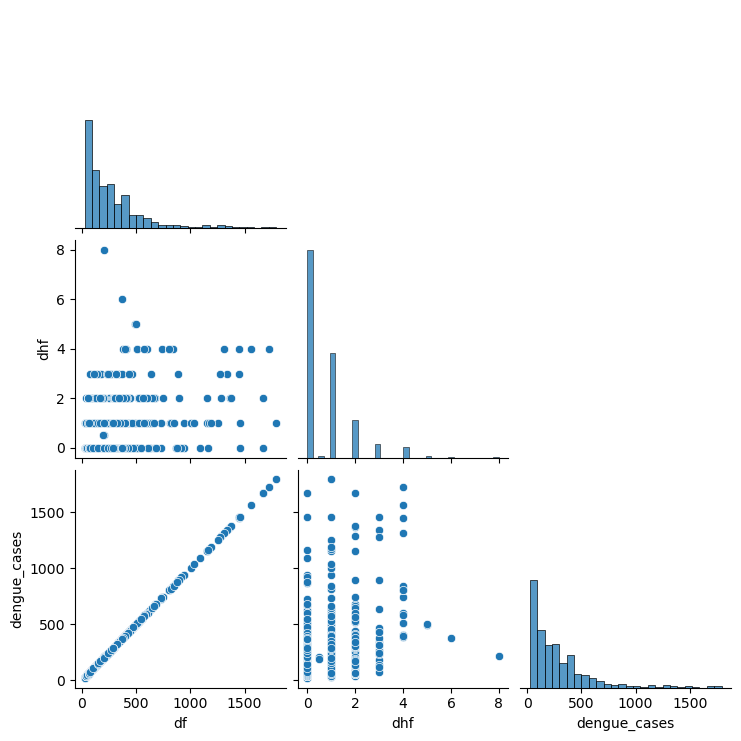

In [7]:
sns.pairplot(dengue_wk[['df', 'dhf', 'dengue_cases']], corner=True);

- Total number of dengue cases is linear to number of DF cases, but not number of DHF cases.
- Interestingly, the max number of DHF cases did not occur in years with high number of total dengue cases, indicating factors other than total dengue cases driving DHF.

### Total dengue cases vs rainfall, temperature and windspeeds

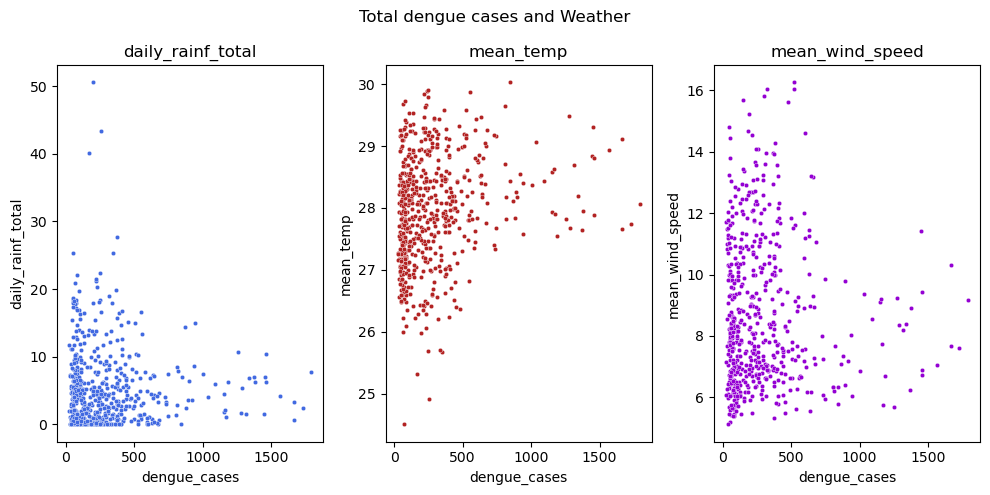

In [8]:
weather_mean = ['daily_rainf_total', 'mean_temp', 'mean_wind_speed']
colors = ['royalblue', 'firebrick', 'darkviolet']

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,5))

for ax, feat, color in zip((ax1, ax2, ax3), weather_mean, colors):
    sns.scatterplot(ax=ax, data=dengue_wk, x='dengue_cases', y=feat, c=color, s=10)
    ax.set_title(f'{feat}')

plt.suptitle('Total dengue cases and Weather')

plt.tight_layout()

Total number of dengue cases vs rainfall, temperature and windspeeds
   - we do not see high dengue cases when mean daily rainfall exceeds ~20mm
   - we do not see high dengue cases when mean daily temperature falls below ~27 degrees celsius
   - we do not see high dengue cases when mean wind speeds exceeds ~12km/h

### Total dengue cases vs google trends

In [9]:
dengue_wk.columns

Index(['df', 'dhf', 'dengue_cases', 'daily_rainf_total', 'highest_30min_rainf',
       'highest_60min_rainf', 'highest_120min_rainf', 'mean_temp', 'max_temp',
       'min_temp', 'mean_wind_speed', 'max_wind_speed', 'dengue_searches',
       'dengue_fever_searches', 'dengue_symptoms_searches'],
      dtype='object')

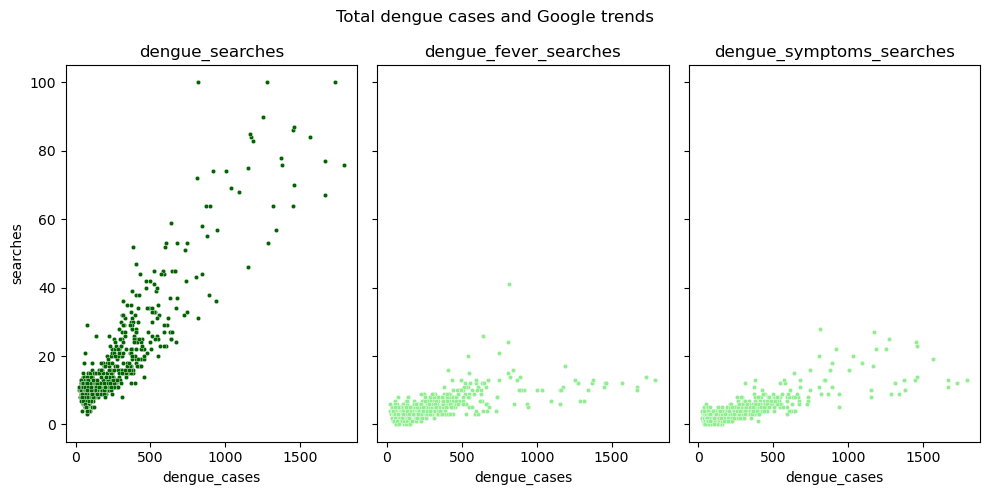

In [10]:
trends = ['dengue_searches', 'dengue_fever_searches', 'dengue_symptoms_searches']
t_colors = ['darkgreen', 'lightgreen', 'lightgreen']

f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(10,5))

for ax, feat, color in zip((ax1, ax2, ax3), trends, t_colors):
    sns.scatterplot(ax=ax, data=dengue_wk, x='dengue_cases', y=feat, c=color, s=10)
    ax.set_ylabel('searches')
    ax.set_title(f'{feat}')

plt.suptitle('Total dengue cases and Google trends')

plt.tight_layout()

- The more significant linear relationship is with the general dengue searches rather than specific "dengue fever" or "dengue symptoms" searches
- The higher the dengue cases, the higher the google search numbers for "dengue" (as expected)

### Correlations between weather data

In [11]:
dengue_wk.columns

Index(['df', 'dhf', 'dengue_cases', 'daily_rainf_total', 'highest_30min_rainf',
       'highest_60min_rainf', 'highest_120min_rainf', 'mean_temp', 'max_temp',
       'min_temp', 'mean_wind_speed', 'max_wind_speed', 'dengue_searches',
       'dengue_fever_searches', 'dengue_symptoms_searches'],
      dtype='object')

In [12]:
weather = ['daily_rainf_total', 'highest_30min_rainf',
       'highest_60min_rainf', 'highest_120min_rainf', 'mean_temp', 'max_temp',
       'min_temp', 'mean_wind_speed', 'max_wind_speed']

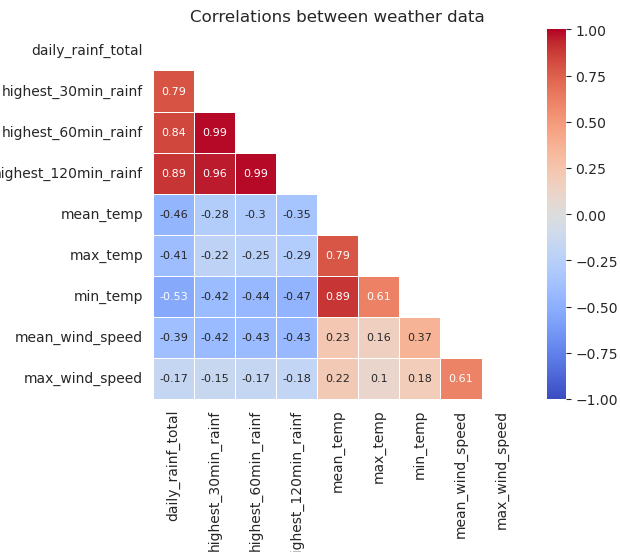

In [13]:
mask = np.zeros_like(dengue_wk[weather].corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    sns.heatmap(dengue_wk[weather].corr(), mask=mask, square=True, annot=True, 
                vmin=-1, vmax=1, cmap='coolwarm',
                linewidths=.5, annot_kws={'size': 8})

plt.title('Correlations between weather data');

As expected, there are significant linear correlations between weather metrics
- Firstly, due to the nature of the relationships between mean/max/mean, there are positive correlations between:
  1) rainfall mean and max 30min/60min/120min (strong correlation);
  2) mean temp and min/max temp (strong correlation); and
  3) mean and max windspeeds (moderate correlation).
- Secondly, with rainfall, we see:
  1) a moderate negative correlation with temperature; and
  2) a weak to moderate negative correlation with mean wind speed.
- Lastly, there is a weak positive correlation between windspeed and temperature.


---

## Dengue Incidence Trends
* Plot overall dengue incidence rate - Cases by week
* Plot Dengue Case count by month
* Plot Dengue Case count by year

Extract just the dengue fever cases for analysis:

In [14]:
dengue_incidence = dengue_wk[['dengue_cases']]
dengue_incidence.head()

dengue_cases
2012-01-01          74.0
2012-01-08          66.0
2012-01-15          61.0
2012-01-22          52.0
2012-01-29          85.0

### Dengue Cases (2012-2022)
*Plot number of dengue cases by week*

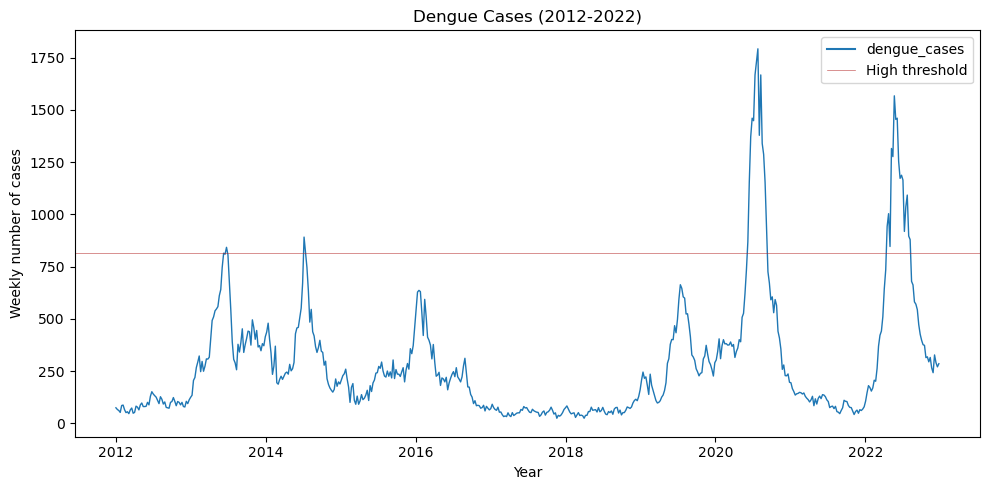

In [15]:
# Plot overall trend
high_threshold = dengue_wk['dengue_cases'].quantile(0.75) + (1.5 * (dengue_wk['dengue_cases'].quantile(0.75) - dengue_wk['dengue_cases'].quantile(0.25)))

plt.figure(figsize=(10, 5))

sns.lineplot(data=dengue_incidence, linewidth=1, color='cornflowerblue')
plt.axhline(high_threshold, label='High threshold', linewidth=0.5, alpha=0.7, color='firebrick')

plt.title("Dengue Cases (2012-2022)")
plt.xlabel("Year")
plt.ylabel("Weekly number of cases")
plt.legend(fontsize='10')

plt.tight_layout();

*Outliers*
- The outliers for Dengue incidence rate shows a build-up and decrease over a time block, which is expected of disease outbreak patterns.

*Troughs*
- There was a period of low dengue rates in 2017 and 2018. According to a [report](https://www.straitstimes.com/singapore/2772-dengue-cases-in-2017-the-lowest-in-the-last-16-years-nea) in The Straits Times, this may be attributed to 3 possible reasons:
1) Build up of herd immunity after dengue outbreaks in previous years;
2) Increased vector control efforts by NEA and the community after the Zika outbreak in second half of 2016;
3) The introduction of 50,000 Gravitraps (traps that catch Aedes aegypti mosquitoes and collect data on them) across the island.

*Peaks*
- The outbreaks in 2020 and 2022 were significantly worse than the previous outbreaks in 2013, 2014, 2016 and 2019. 
- The outbreak in 2020 was explored in an [article](https://www.ncid.sg/Health-Professionals/Articles/Pages/Epidemic-Dengue-in-Singapore-During-COVID-19-Pandemic.aspx) published by an epidemiologist at NCID, stating the possible contributory factors as follows:
    1) Change in prevalent serotype from DEN-1 and DEN-2, to DEN-3 and DEN-4 during this outbreak, so there was lower herd immunity to these strains;
    2) Dengue transmission in/near homes due to the increase in work-from-home as part of COVID-19's safe management measures;
    3) Humidity and warmer temperatures.
- For 2022, an [article](https://www.straitstimes.com/singapore/health/singapore-records-19-dengue-deaths-in-2022-nearly-four-times-2021-s-toll) in The Straits Times reported that 62.3% of the 2022 cases were of DEN-3 serotype, which may have led to increased transmission due to lower herd immunity.


### Total Dengue cases by Year
*Plot Dengue Case count by year*

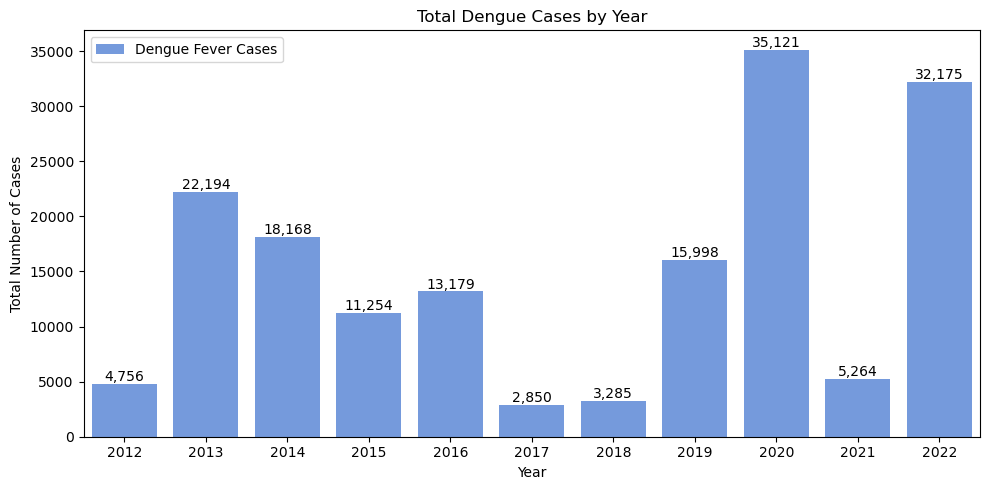

In [16]:
# Resample dengue_cases to group by years
dengue_yearly = dengue_incidence.resample('Y').sum()

# Plot averages in a bar chart
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=dengue_yearly, x=dengue_yearly.index.year, y='dengue_cases', 
                 color='cornflowerblue', label='Dengue Fever Cases')
plt.title("Total Dengue Cases by Year")
plt.xlabel("Year")
plt.ylabel("Total Number of Cases")
plt.legend()
plt.tight_layout()

# Add actual numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2.,
                                           p.get_height()), ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=10, color='black')
plt.show()

Per observations on previous graph, "Dengue Cases (2012-2022)", peaks and troughs noted with total number of cases in those years:
- 2017/2018 trough - 2,850 / 3,285
- 2013/2014 peak - 22,194 / 18,168
- 2020/2022 peak - 35,121 / 32,175

### Average Dengue Cases by Month

Plot Dengue Case count by month:

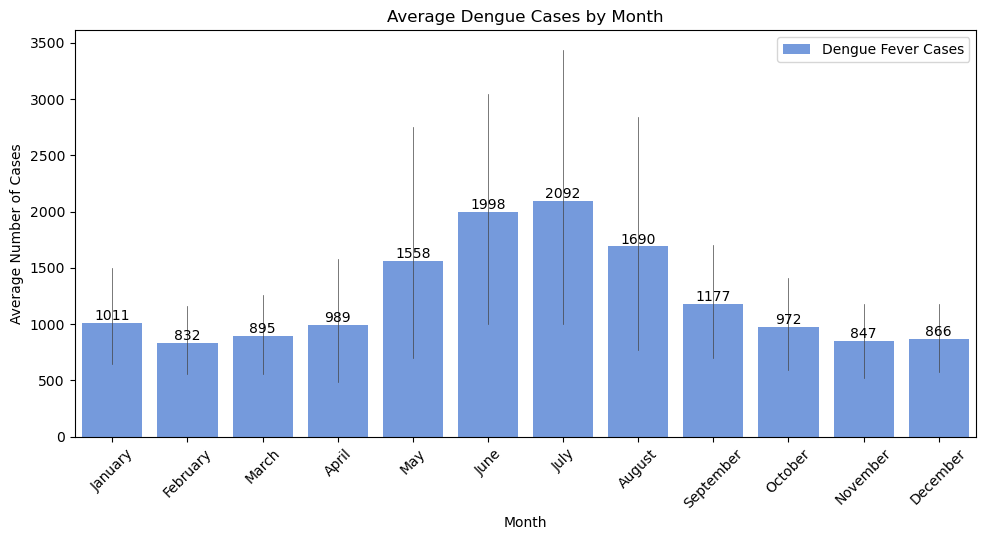

In [17]:
# Resample dengue_cases to group by months
dengue_monthly = dengue_incidence.resample('M').sum()

# Plot averages in a bar chart
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=dengue_monthly, x=dengue_monthly.index.month_name(), y='dengue_cases', 
                 color='cornflowerblue', label='Dengue Fever Cases', errwidth=.5)
plt.title("Average Dengue Cases by Month")
plt.xlabel("Month")
plt.ylabel("Average Number of Cases")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)

# Add actual numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2.,
                                           p.get_height()), ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=10, color='black')
plt.show()

Dengue tends to peak in the middle of the year, in Jun and Jul.

### Seasonal Decomposition for Dengue Cases

From the plot of number of dengue cases over time, the peaks in 2020 and 2022 are much higher than previous peaks. There is also some variation int the seasonality with some peaks earlier in the year (vs usual Jun and Jul). Hence, use a multiplicative model for seasonal decomposition, rather than additive model (which is for linear trends, with seasonality of the same frequency (width of cycles) and amplitude (height of cycles).

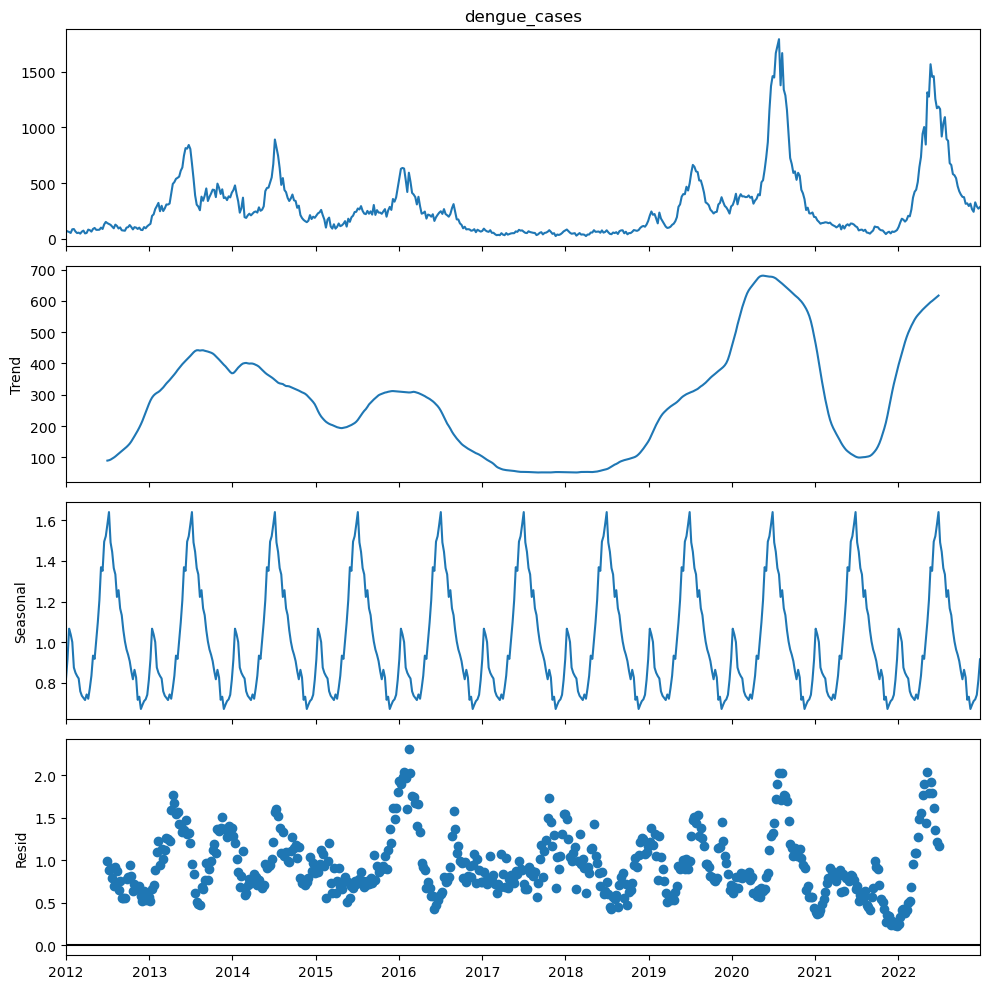

In [18]:
decomposition = seasonal_decompose(dengue_wk['dengue_cases'], model='multiplicative')

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches((10,10))
fig.tight_layout();

From the seasonal decomposition plot, we are able to observe the following:

1) Trend: Dengue trend is not linear, and is instead a series of peaks and troughs
2) Seasonality: Width between cycles is 12 months (peak-to-peak, trough-to-trough)
3) Residuals: Residuals are high in 2016 when there was an unusual peak in the first quarter of the year, and in 2020 and 2022 when peaks were unusually high 

---

## Google Search Trends
* Plot the various google searches over time

In [19]:
google_trends = dengue_wk[['dengue_searches', 'dengue_fever_searches', 'dengue_symptoms_searches']]

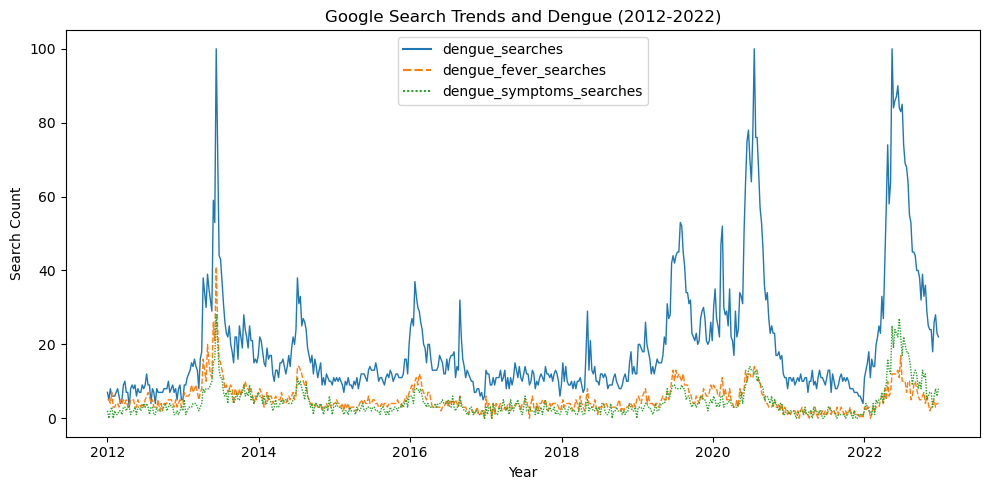

In [20]:
# Plot overall trend
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Google Search Trends and Dengue (2012-2022)")

sns.lineplot(ax=ax, data=google_trends, linewidth=1, color='cornflowerblue')
ax.set_xlabel("Year")
ax.set_ylabel("Search Count")

plt.tight_layout()
plt.show()

We see similar trends across all 3 search terms and the search trends exhibit sharp increases during specific periods. </br>
'dengue_searches' again seems to be the more all-encompassing term.

To see if the search peaks mathc with dengue peaks, plot 'dengue_searches' together with weekly number of dengue cases.

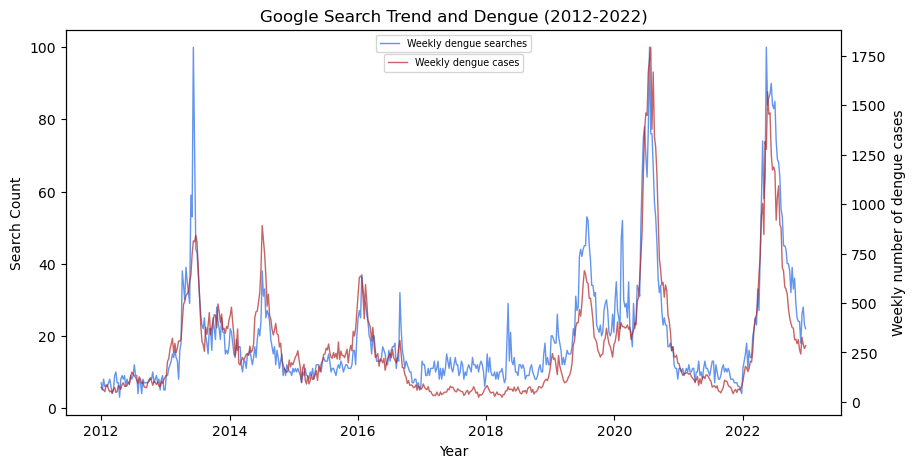

In [21]:
# Plot together with number of dengue cases

fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Google Search Trend and Dengue (2012-2022)")

sns.lineplot(ax=ax, data=dengue_wk['dengue_searches'], linewidth=1, color='cornflowerblue', label = 'Weekly dengue searches')
ax.set_xlabel("Year")
ax.set_ylabel("Search Count")
plt.legend(fontsize='x-small', loc='upper center')

ax2 = ax.twinx()

sns.lineplot(ax=ax2, data=dengue_wk['dengue_cases'], linewidth=1, alpha=0.7, color='firebrick', label='Weekly dengue cases')
ax2.set_ylabel('Weekly number of dengue cases')
plt.legend(fontsize='x-small', loc='upper center', bbox_to_anchor=(0.5,0.95))

plt.show()

As suspected, the number of searches for dengue closely mirrors that of dengue cases.</br>
This is also in line with the linear relationship between dengue searches and dengue cases observed from our pairplots above.

---

## Weather Trends
*Per pairplots above, the max/min weather variables are closely correlated with the weekly mean variables, so focus on the mean weather variables for EDA*

* Plot overall linear charts
* Plot seasonal decomposition charts
* Plot dengue_cases against rainfall, temperature and windspeeds

### Linear charts

First, plot linear charts of each weather variable to get a sense of the general trends and also to review outliers. </br>
This would also help us decide whether to use an additive or multiplicative model for seasonal decomposition later.

In [22]:
dengue_wk.columns

Index(['df', 'dhf', 'dengue_cases', 'daily_rainf_total', 'highest_30min_rainf',
       'highest_60min_rainf', 'highest_120min_rainf', 'mean_temp', 'max_temp',
       'min_temp', 'mean_wind_speed', 'max_wind_speed', 'dengue_searches',
       'dengue_fever_searches', 'dengue_symptoms_searches'],
      dtype='object')

In [23]:
1.5 * (dengue_wk['mean_wind_speed'].quantile(0.75) - dengue_wk['mean_wind_speed'].quantile(0.25))

5.073214285714286

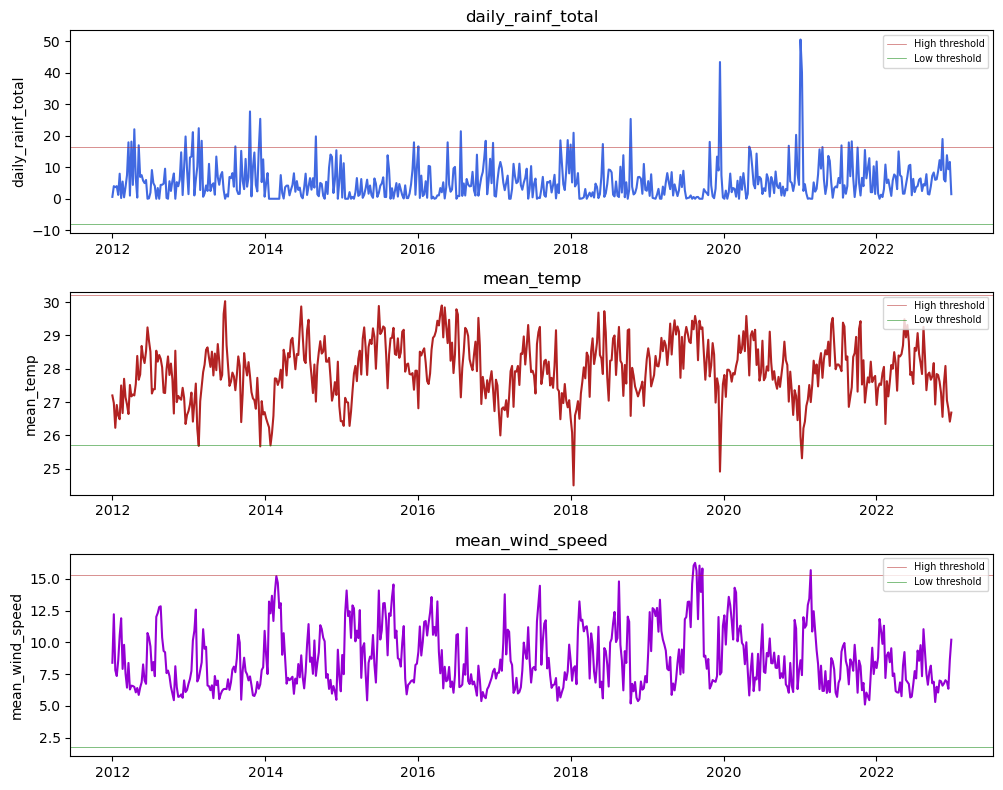

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,8))

for ax, feat, color in zip((ax1, ax2, ax3), weather_mean, colors):
    sns.lineplot(ax=ax, data=dengue_wk[feat], color=color)
    ax.axhline(dengue_wk[feat].quantile(0.75) + (1.5 * (dengue_wk[feat].quantile(0.75) - dengue_wk[feat].quantile(0.25))), 
                label='High threshold', linewidth=0.5, alpha=0.7, color='firebrick')
    ax.axhline(dengue_wk[feat].quantile(0.25) - (1.5 * (dengue_wk[feat].quantile(0.75) - dengue_wk[feat].quantile(0.25))), 
                label='Low threshold', linewidth=0.5, alpha=0.7, color='green')
    ax.set_title(feat)
    ax.legend(loc='upper right', fontsize='x-small')

plt.tight_layout();

**Correlations**
- Peaks in rainfall tend to correspond with troughs in temperature, in line with the negative correlation plot earlier.
- Peaks and troughs between windspeed and rainfall/temperature are more inconsistent, corresponding with the weaker correlation numbers observed earlier.

**Outliers**
- The outliers are generally in line with localised temporal time trends, and do not seem indicative of erroneous data
- It may be observed that these outliers occur more often and are more pronounced in the latter half of the charts, which may be indicative of climate change trends with more extreme weather.

**For seasonal decomposition**
- There isn't an obvious overall trend in the weather features above. Hence, try the additive model for seasonal decomposition.

### Seasonal decomposition

In [25]:
#create function for seasonal decomposition plots
def seasonal_decomposition(df, column):
    # Perform seasonal decomposition 
    decomposition = seasonal_decompose(df[column], model='additive')

    # Plot the decomposition
    fig = decomposition.plot()
    fig.set_size_inches((10,10))
    fig.tight_layout();

#### Rainfall

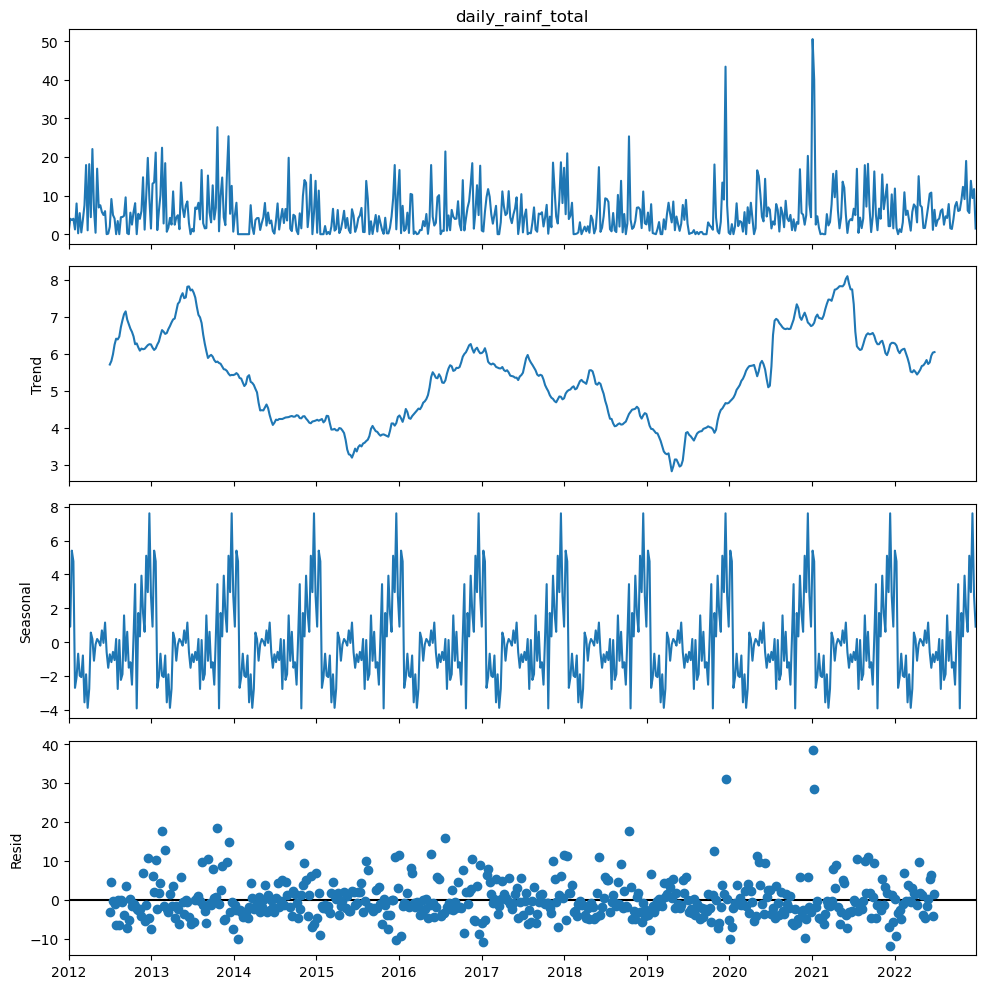

In [26]:
seasonal_decomposition(dengue_wk, 'daily_rainf_total');

**Trend**
- The overall trend seems to cycle ~5 years, possibly due to ENSO (El Nino Southern Oscillation).
- La Nina years tend to bring more rain to Singapore, and this was the case with peaks for the La Nina years in 2016 (weak), 2017 (weak), 2020 (moderate), 2021 (moderate), 2022 (weak) ([source](https://ggweather.com/enso/oni.htm)). 2013 was a signal that was on the cool side but not strong enough to be classified as a La Nina event ([source](https://climate.washington.edu/events/2014winter/#:~:text=While%20SSTs%20were%20a%20bit,ENSO%20signal%20has%20been%20neutral.)).

**Seasonality**
- There is a clear seasonal trend with peaks at the end of the year, in line with the Northeast Monsoon season which brings the rainy season to Singapore ([source](http://www.weather.gov.sg/climate-climate-of-singapore/))

**Residual**
- High residuals noticed in the extreme wet years of 2020 and 2021, with moderate La Nina effects (vs weak La Nina in 2017).

#### Temperature

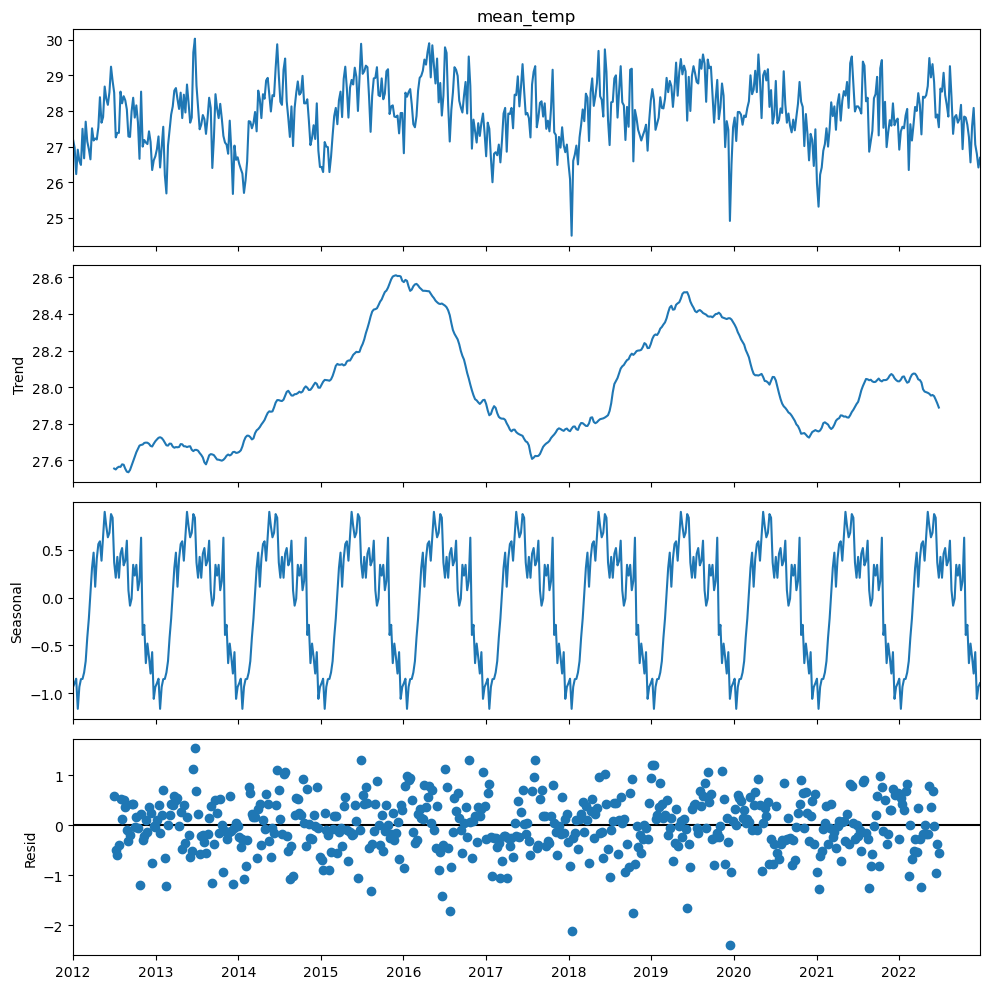

In [27]:
seasonal_decomposition(dengue_wk, 'mean_temp');

**Trend**
- There is a trend with a frequency that varies from 2-5 years.
- This is in line with the ENSO phenomenon again, with higher temperatures expected in El Nino years and lower temperature in La Nina years.
- El Nino occured in 2014 (weak), 2015 (very strong), 2018 (weak).
- La Nina occured in 2016 (weak), 2017 (weak), 2020 (moderate), 2021 (moderate), 2022 (weak).

**Seasonality**
- There is a clear annual trend, in line with expectations with the hot period in the middle of the year, with the Southwest Monsoon bringing higher temperatures.

**Residuals**
- We can see the residuals increase when there are extemities in temperatures, especially in the La Nina years where experience see cooler temperatures.

#### Wind speeds

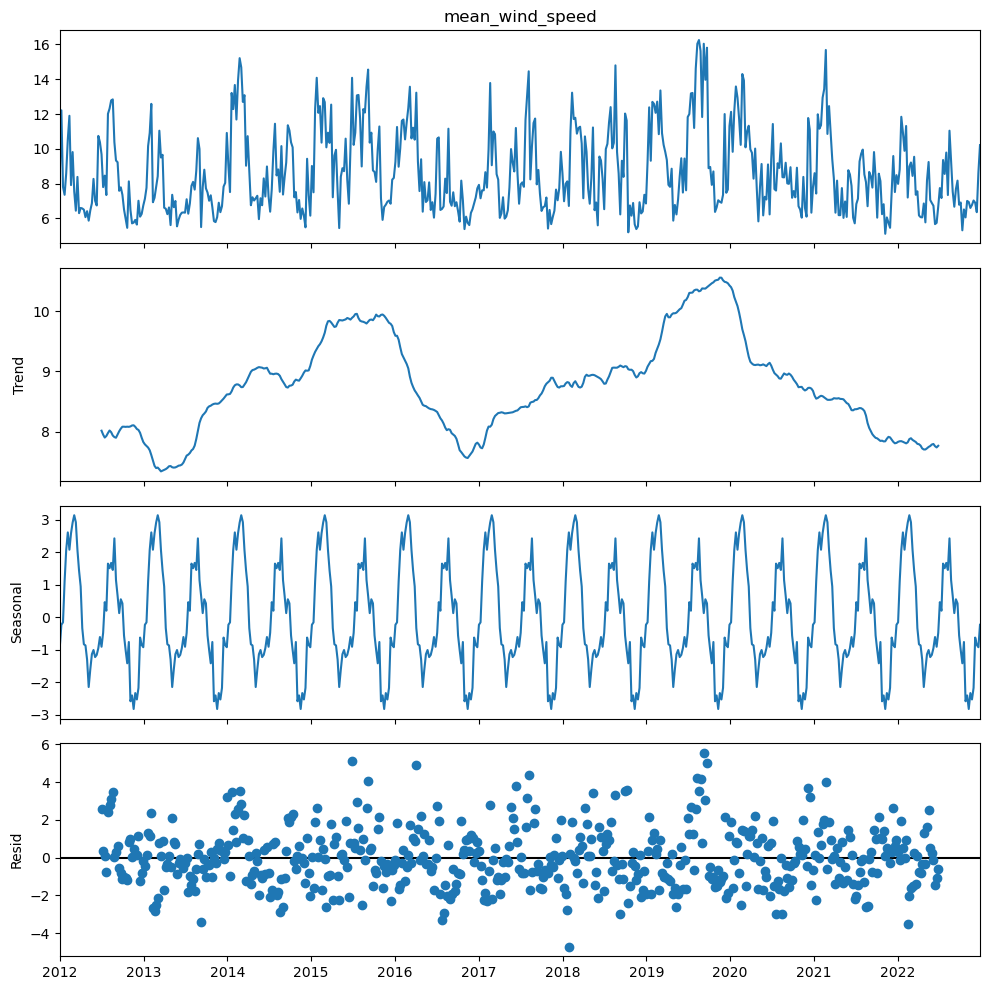

In [28]:
seasonal_decomposition(dengue_wk, 'mean_wind_speed');

**Trend**
- There is a trend with a frequency that varies from 4-5 years.
- This may be in line with the ENSO phenomenon again
- El Nino occured in 2014 (weak), 2015 (very strong), 2018 (weak), which seem to correspond with the peaks of the trend.

**Seasonality**
- There is a trend with frequency of ~6 months, with higher wind speeds in the first and third quarter of the year. 

**Residuals**
- There isn't a clear trend on the residuals, but it's quite dispersed from the null line, indicating that the trend and seasonality for wind speed is not as strong as that for rainfall and temperature.

### Weather variables and Dengue

Given the clear seasonality of weather variables and dengue from the decomposition plots above, it would help to plot 11-year mean of the weekly data over period of 2012-2022, to see the relationships between dengue and weather variables over an "average year".

In [29]:
# Step 1. Resample data to monthly basis

dengue_mthly = dengue_wk[['dengue_cases']].resample('M').sum()

for feat in ['daily_rainf_total', 'mean_temp', 'mean_wind_speed']:
    dengue_mthly[feat] = dengue_wk[feat].resample('M').mean()

# re-name columns
dengue_mthly.columns = ['mthly_dengue_cases', 'mean_daily_rainf', 'mean_temp', 'mean_wind_speed']
        
dengue_mthly.head()    

mthly_dengue_cases  mean_daily_rainf  mean_temp  mean_wind_speed
2012-01-31               338.0          2.702857  26.782857         8.874286
2012-02-29               258.0          3.525000  27.089286        10.042857
2012-03-31               231.0          7.550000  27.057143         7.167857
2012-04-30               363.0         10.291429  27.505714         6.431429
2012-05-31               338.0          9.278571  28.132143         6.867857

In [30]:
# Step 2. Pivot on the month

average_year = dengue_mthly.pivot_table(values = ['mthly_dengue_cases', 'mean_daily_rainf', 'mean_temp', 'mean_wind_speed'], 
                                        index=dengue_mthly.index.month, aggfunc='mean')

# re-arrange columns
average_year = average_year[['mthly_dengue_cases', 'mean_daily_rainf', 'mean_temp', 'mean_wind_speed']]

average_year

mthly_dengue_cases  mean_daily_rainf  mean_temp  mean_wind_speed
1          1011.590909          6.230390  27.003766         9.765107
2           832.272727          3.679545  27.252597        11.328556
3           895.363636          3.218571  28.067338        10.191364
4           989.272727          5.784805  28.357857         7.536623
5          1558.636364          5.523117  28.716688         7.419286
6          1998.272727          4.907532  28.561948         7.869096
7          2092.000000          4.243506  28.411364         9.358052
8          1690.181818          4.550779  28.326039        10.337857
9          1177.000000          4.274221  28.124156         9.042392
10          972.818182          5.310390  28.135584         7.412214
11          847.000000          7.317013  27.448182         6.296364
12          866.818182          9.271039  27.189935         7.796039

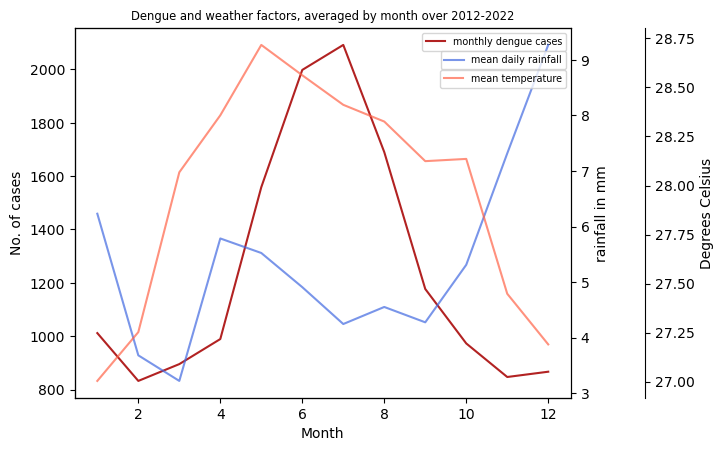

In [31]:
# Step 3. Plot on the same graph

fig, ax = plt.subplots()
plt.title('Dengue and weather factors, averaged by month over 2012-2022', fontsize='small')

ax.plot(average_year.index, average_year['mthly_dengue_cases'],
        color='firebrick',
        label='monthly dengue cases')
ax.set_xlabel('Month')
ax.set_ylabel('No. of cases')
plt.legend(fontsize='x-small', loc='upper right')

ax2 = ax.twinx()
ax2.plot(average_year.index, average_year['mean_daily_rainf'],
         color='royalblue',
         alpha=0.7,
         label='mean daily rainfall')
ax2.set_ylabel('rainfall in mm')
plt.legend(fontsize='x-small', loc='upper right', bbox_to_anchor=(1,0.95))
         
ax3 = ax.twinx()
ax3.spines.right.set_position(("axes", 1.15))
ax3.plot(average_year.index, average_year['mean_temp'],
         color='tomato',
         alpha=0.7,
         label='mean temperature')
ax3.set_ylabel('Degrees Celsius')
plt.legend(fontsize='x-small', loc='upper right', bbox_to_anchor=(1,0.9));         

The following observations may be made:

1) It's clear that dengue tends to peak in the middle of the year, in Jun-Jul.
2) This peak follows a period of increasing mean monthly temperatures, with a lag time that decreases as temperature increases. To explore this time lag further below.
4) This peak also occurs after a period of moderate rainfall, which also exhibits a time lag.
5) The extreme increase in rainfall at the end of the year is inversely related to dengue incidence rates.
   - This is in line with [Yien Ling Hii et al](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2799326/))'s assertions that "\[h]eavy precipitation destroys larvae and reduces survival rate of female mosquitoes in the short period..."


**Time lag between climate factors and dengue incidence**<br>

*Sources:*
- [Aedes mosquito life cycle](https://www.nea.gov.sg/dengue-zika/prevent-aedes-mosquito-breeding/aedes-mosquito)
- [Dengue and Dengue Hemorrhagic Fever, Duane J Gubler](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC88892/)

In general, the time lag between climate factors and dengue incidence may be accounted for by:
1) The time it takes for Aedes mosquitoes to go through their life (~6 days or less)
2) Extrinsic incubation period, or the time from a mosquito biting an infected person to the time it may then infect others (~7-14 days)
3) Time taken for a bitten individual to exhibit dengue symptoms (5-7 days)


**Explaining the time lag between temperature and dengue**

Source: [Climate variability and increase in intensity and magnitude of dengue incidence in Singapore, Yien Ling Hii et al](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2799326/)

What epidemiologists have found is that temperature could affect the Aedes mosquito's:
1) Population size
2) Maturation period
3) Feeding characteristics
4) Survival rates

- At 15-30 degrees (Celsius), adult Aedes mosquitoes experience lower mortality rates
- At 32 degrees, Aedes mosquitoes:
  - Have shorter reproductive cycles
  - Pupae development may reduce to less than 1 day (from 4 days at 22 degrees)
  - Feeding frequency increases more than 2-fold (compared to at 24 degrees)
  - Extrinsic incubation period of Dengue viruses shortens to 7 days (from 12 days at 30 degrees)

We can see this shortening of cycles in the above chart, with the lag time reducing as temperature increases.

**Overall time lag**

From the above, time lag is ~3 to 4 weeks. With generally higher temperatures in Singapore, expect reduced time for life cycle and extrinsic incubation, so will go with 3-week time lag.

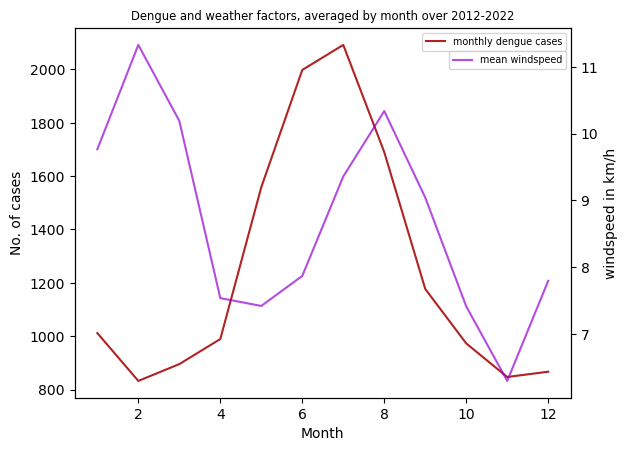

In [32]:
# Examine relationship between dengue and wind speeds separately to avoid overcrowding above chart

fig, ax = plt.subplots()
plt.title('Dengue and weather factors, averaged by month over 2012-2022', fontsize='small')

ax.plot(average_year.index, average_year['mthly_dengue_cases'],
        color='firebrick',
        label='monthly dengue cases')
ax.set_xlabel('Month')
ax.set_ylabel('No. of cases')
plt.legend(fontsize='x-small', loc='upper right')

ax2 = ax.twinx()
ax2.plot(average_year.index, average_year['mean_wind_speed'],
         color='darkviolet',
         alpha=0.7,
         label='mean windspeed')
ax2.set_ylabel('windspeed in km/h')
plt.legend(fontsize='x-small', loc='upper right', bbox_to_anchor=(1,0.95));


- Relationship between windspeeds and dengue is not very clear. However, building on the observation from the pairplot above (that high dengue rates are not observed beyond windspeeds of 11km/h), it is more likely to be an inverse relationship beyond 10km/h.
- Furthermore, building on knowledge from the lag times above, there is a likely time lag of 3-4 weeks.

## Dengue Correlations
Target y-var (No of dengue cases) vs all other features

#### Adding time-lags

**Weather factors**
Before plotting correlations, given notable time lags for weather data from observations above, we will need to shift data within the datatable before computing correlation.<br>
- Use 3-week time lag for weather factors given background knowledge above.

**Google searches**
- It wouldn't be possible to use future data to predict future data, so lag google search factors by a single time point

In [33]:
dengue_wk.head(10)

df  dhf  dengue_cases  daily_rainf_total  highest_30min_rainf  \
2012-01-01  74.0  0.0          74.0           0.600000             0.600000   
2012-01-08  64.0  2.0          66.0           4.000000             1.468296   
2012-01-15  60.0  1.0          61.0           3.685714             0.808308   
2012-01-22  50.0  2.0          52.0           4.000000             2.701471   
2012-01-29  84.0  1.0          85.0           1.228571             0.871997   
2012-02-05  87.0  0.0          87.0           7.957143             0.947237   
2012-02-12  65.0  0.0          65.0           0.228571             0.228571   
2012-02-19  50.0  1.0          51.0           5.457143             2.062549   
2012-02-26  55.0  0.0          55.0           0.457143             0.457143   
2012-03-04  45.0  1.0          46.0           3.771429             1.738019   

            highest_60min_rainf  highest_120min_rainf  mean_temp   max_temp  \
2012-01-01             0.600000              0.600000  27.200000  31.400000   
2012-01-08             1.468296              1.776585  26.971429  30.542857   
2012-01-15             1.158314              1.754746  26.228571  29.500000   
2012-01-22             3.206600              3.225174  26.914286  31.300000   
2012-01-29             0.916665              0.962512  26.600000  30.600000   
2012-02-05             1.458087              2.583774  26.485714  30.171429   
2012-02-12             0.228571              0.228571  27.500000  31.585714   
2012-02-19             2.353432              2.823749  26.671429  30.942857   
2012-02-26             0.457143              0.457143  27.700000  31.485714   
2012-03-04             2.009781              2.521789  27.142857  31.671429   

             min_temp  mean_wind_speed  max_wind_speed  dengue_searches  \
2012-01-01  25.200000         8.400000       28.400000                7   
2012-01-08  24.785714        12.214286       34.600000                5   
2012-01-15  23.828571         7.814286       34.214286                8   
2012-01-22  24.471429         7.357143       28.042857                6   
2012-01-29  24.400000         8.585714       30.857143                6   
2012-02-05  23.942857        10.542857       33.171429                6   
2012-02-12  24.814286        11.900000       34.400000                7   
2012-02-19  23.971429         7.914286       30.942857                8   
2012-02-26  25.471429         9.814286       29.471429                6   
2012-03-04  24.971429         7.542857       33.814286                4   

            dengue_fever_searches  dengue_symptoms_searches  
2012-01-01                      5                         2  
2012-01-08                      5                         0  
2012-01-15                      4                         2  
2012-01-22                      7                         3  
2012-01-29                      3                         0  
2012-02-05                      3                         2  
2012-02-12                      4                         1  
2012-02-19                      4                         1  
2012-02-26                      3                         2  
2012-03-04                      5                         2

In [34]:
# recall weather (list of column headers related to weather variables)
weather

['daily_rainf_total',
 'highest_30min_rainf',
 'highest_60min_rainf',
 'highest_120min_rainf',
 'mean_temp',
 'max_temp',
 'min_temp',
 'mean_wind_speed',
 'max_wind_speed']

In [35]:
# create new lagged dataframe
dengue_lagged = dengue_wk.copy()

# add 3-week lag to all weather features
for feat in weather:
    dengue_lagged[feat] = dengue_wk[feat].shift(3)

# add 1 time point lag for google search data
for search_feat in ['dengue_searches', 'dengue_fever_searches', 'dengue_symptoms_searches']:
    dengue_lagged[search_feat] = dengue_wk[search_feat].shift(1)
    
# compare new df against original above
dengue_lagged.head(10)

df  dhf  dengue_cases  daily_rainf_total  highest_30min_rainf  \
2012-01-01  74.0  0.0          74.0                NaN                  NaN   
2012-01-08  64.0  2.0          66.0                NaN                  NaN   
2012-01-15  60.0  1.0          61.0                NaN                  NaN   
2012-01-22  50.0  2.0          52.0           0.600000             0.600000   
2012-01-29  84.0  1.0          85.0           4.000000             1.468296   
2012-02-05  87.0  0.0          87.0           3.685714             0.808308   
2012-02-12  65.0  0.0          65.0           4.000000             2.701471   
2012-02-19  50.0  1.0          51.0           1.228571             0.871997   
2012-02-26  55.0  0.0          55.0           7.957143             0.947237   
2012-03-04  45.0  1.0          46.0           0.228571             0.228571   

            highest_60min_rainf  highest_120min_rainf  mean_temp   max_temp  \
2012-01-01                  NaN                   NaN        NaN        NaN   
2012-01-08                  NaN                   NaN        NaN        NaN   
2012-01-15                  NaN                   NaN        NaN        NaN   
2012-01-22             0.600000              0.600000  27.200000  31.400000   
2012-01-29             1.468296              1.776585  26.971429  30.542857   
2012-02-05             1.158314              1.754746  26.228571  29.500000   
2012-02-12             3.206600              3.225174  26.914286  31.300000   
2012-02-19             0.916665              0.962512  26.600000  30.600000   
2012-02-26             1.458087              2.583774  26.485714  30.171429   
2012-03-04             0.228571              0.228571  27.500000  31.585714   

             min_temp  mean_wind_speed  max_wind_speed  dengue_searches  \
2012-01-01        NaN              NaN             NaN              NaN   
2012-01-08        NaN              NaN             NaN              7.0   
2012-01-15        NaN              NaN             NaN              5.0   
2012-01-22  25.200000         8.400000       28.400000              8.0   
2012-01-29  24.785714        12.214286       34.600000              6.0   
2012-02-05  23.828571         7.814286       34.214286              6.0   
2012-02-12  24.471429         7.357143       28.042857              6.0   
2012-02-19  24.400000         8.585714       30.857143              7.0   
2012-02-26  23.942857        10.542857       33.171429              8.0   
2012-03-04  24.814286        11.900000       34.400000              6.0   

            dengue_fever_searches  dengue_symptoms_searches  
2012-01-01                    NaN                       NaN  
2012-01-08                    5.0                       2.0  
2012-01-15                    5.0                       0.0  
2012-01-22                    4.0                       2.0  
2012-01-29                    7.0                       3.0  
2012-02-05                    3.0                       0.0  
2012-02-12                    3.0                       2.0  
2012-02-19                    4.0                       1.0  
2012-02-26                    4.0                       1.0  
2012-03-04                    3.0                       2.0

In [36]:
# drop null values
dengue_lagged.dropna(inplace=True)

dengue_lagged.head(10)

df  dhf  dengue_cases  daily_rainf_total  highest_30min_rainf  \
2012-01-22  50.0  2.0          52.0           0.600000             0.600000   
2012-01-29  84.0  1.0          85.0           4.000000             1.468296   
2012-02-05  87.0  0.0          87.0           3.685714             0.808308   
2012-02-12  65.0  0.0          65.0           4.000000             2.701471   
2012-02-19  50.0  1.0          51.0           1.228571             0.871997   
2012-02-26  55.0  0.0          55.0           7.957143             0.947237   
2012-03-04  45.0  1.0          46.0           0.228571             0.228571   
2012-03-11  64.0  0.0          64.0           5.457143             2.062549   
2012-03-18  72.0  1.0          73.0           0.457143             0.457143   
2012-03-25  48.0  0.0          48.0           3.771429             1.738019   

            highest_60min_rainf  highest_120min_rainf  mean_temp   max_temp  \
2012-01-22             0.600000              0.600000  27.200000  31.400000   
2012-01-29             1.468296              1.776585  26.971429  30.542857   
2012-02-05             1.158314              1.754746  26.228571  29.500000   
2012-02-12             3.206600              3.225174  26.914286  31.300000   
2012-02-19             0.916665              0.962512  26.600000  30.600000   
2012-02-26             1.458087              2.583774  26.485714  30.171429   
2012-03-04             0.228571              0.228571  27.500000  31.585714   
2012-03-11             2.353432              2.823749  26.671429  30.942857   
2012-03-18             0.457143              0.457143  27.700000  31.485714   
2012-03-25             2.009781              2.521789  27.142857  31.671429   

             min_temp  mean_wind_speed  max_wind_speed  dengue_searches  \
2012-01-22  25.200000         8.400000       28.400000              8.0   
2012-01-29  24.785714        12.214286       34.600000              6.0   
2012-02-05  23.828571         7.814286       34.214286              6.0   
2012-02-12  24.471429         7.357143       28.042857              6.0   
2012-02-19  24.400000         8.585714       30.857143              7.0   
2012-02-26  23.942857        10.542857       33.171429              8.0   
2012-03-04  24.814286        11.900000       34.400000              6.0   
2012-03-11  23.971429         7.914286       30.942857              4.0   
2012-03-18  25.471429         9.814286       29.471429              5.0   
2012-03-25  24.971429         7.542857       33.814286              9.0   

            dengue_fever_searches  dengue_symptoms_searches  
2012-01-22                    4.0                       2.0  
2012-01-29                    7.0                       3.0  
2012-02-05                    3.0                       0.0  
2012-02-12                    3.0                       2.0  
2012-02-19                    4.0                       1.0  
2012-02-26                    4.0                       1.0  
2012-03-04                    3.0                       2.0  
2012-03-11                    5.0                       2.0  
2012-03-18                    4.0                       1.0  
2012-03-25                    5.0                       3.0

#### Replot weather factors against dengue
*To see how lag factor affects the relationships with dengue numbers*

In [37]:
# Replot dengue and weather features chart above

dengue_mthly_lagged = dengue_lagged[['dengue_cases']].resample('M').sum()

for feat in ['daily_rainf_total', 'mean_temp', 'mean_wind_speed']:
    dengue_mthly_lagged[feat] = dengue_lagged[feat].resample('M').mean()

# re-name columns
dengue_mthly_lagged.columns = ['mthly_dengue_cases', 'mean_daily_rainf', 'mean_temp', 'mean_wind_speed']
        
# Step 2. Pivot on the month

average_year_lagged = dengue_mthly_lagged.pivot_table(values = ['mthly_dengue_cases', 'mean_daily_rainf', 'mean_temp', 'mean_wind_speed'], 
                                        index=dengue_mthly_lagged.index.month, aggfunc='mean')

# re-arrange columns
average_year_lagged = average_year_lagged[['mthly_dengue_cases', 'mean_daily_rainf', 'mean_temp', 'mean_wind_speed']]

average_year_lagged


mthly_dengue_cases  mean_daily_rainf  mean_temp  mean_wind_speed
1           993.318182          9.207727  27.074091         8.371364
2           832.272727          4.613961  27.083766        10.525042
3           895.363636          3.302727  27.445844        11.214988
4           989.272727          4.498442  28.172078         9.211623
5          1558.636364          5.288312  28.471299         7.215649
6          1998.272727          6.095325  28.692078         7.584675
7          2092.000000          3.713766  28.599416         8.312213
8          1690.181818          4.264156  28.361494         9.763896
9          1177.000000          5.267143  28.162792         9.962338
10          972.818182          3.985974  28.179091         8.618303
11          847.000000          6.212208  27.968961         6.946971
12          866.818182          7.764286  27.387987         6.650519

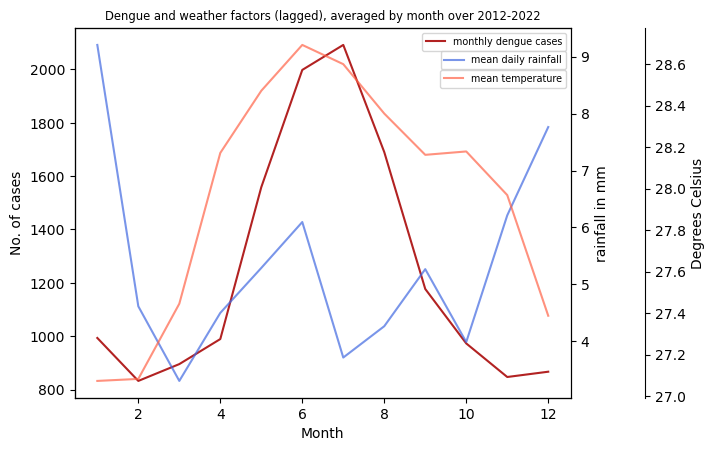

In [38]:
# Step 3. Plot on the same graph

fig, ax = plt.subplots()
plt.title('Dengue and weather factors (lagged), averaged by month over 2012-2022', fontsize='small')

ax.plot(average_year_lagged.index, average_year_lagged['mthly_dengue_cases'],
        color='firebrick',
        label='monthly dengue cases')
ax.set_xlabel('Month')
ax.set_ylabel('No. of cases')
plt.legend(fontsize='x-small', loc='upper right')

ax2 = ax.twinx()
ax2.plot(average_year_lagged.index, average_year_lagged['mean_daily_rainf'],
         color='royalblue',
         alpha=0.7,
         label='mean daily rainfall')
ax2.set_ylabel('rainfall in mm')
plt.legend(fontsize='x-small', loc='upper right', bbox_to_anchor=(1,0.95))
         
ax3 = ax.twinx()
ax3.spines.right.set_position(("axes", 1.15))
ax3.plot(average_year_lagged.index, average_year_lagged['mean_temp'],
         color='tomato',
         alpha=0.7,
         label='mean temperature')
ax3.set_ylabel('Degrees Celsius')
plt.legend(fontsize='x-small', loc='upper right', bbox_to_anchor=(1,0.9));     

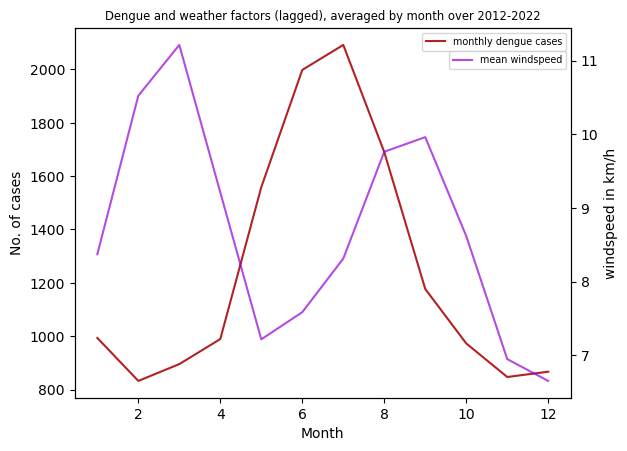

In [39]:
# Re-plot dengue and wind speeds separately to avoid overcrowding above chart

fig, ax = plt.subplots()
plt.title('Dengue and weather factors (lagged), averaged by month over 2012-2022', fontsize='small')

ax.plot(average_year_lagged.index, average_year_lagged['mthly_dengue_cases'],
        color='firebrick',
        label='monthly dengue cases')
ax.set_xlabel('Month')
ax.set_ylabel('No. of cases')
plt.legend(fontsize='x-small', loc='upper right')

ax2 = ax.twinx()
ax2.plot(average_year_lagged.index, average_year_lagged['mean_wind_speed'],
         color='darkviolet',
         alpha=0.7,
         label='mean windspeed')
ax2.set_ylabel('windspeed in km/h')
plt.legend(fontsize='x-small', loc='upper right', bbox_to_anchor=(1,0.95));

Generally, the lagged weather factors are showing more direct relationships with dengue now.<br>

However, before plotting correlation heatmap, noted from above that rainfall and dengue exhibit a more complex relationship, with initial increase in rainfall having a positive impact on dengue, but increase to extremities in rainfall having a negative impact on dengue as Aedes larvae are washed away. Therefore, include a feature of rainfall features-squared for correlation analysis.

### Adding rainfall_features^2

In [40]:
dengue_lagged.columns

Index(['df', 'dhf', 'dengue_cases', 'daily_rainf_total', 'highest_30min_rainf',
       'highest_60min_rainf', 'highest_120min_rainf', 'mean_temp', 'max_temp',
       'min_temp', 'mean_wind_speed', 'max_wind_speed', 'dengue_searches',
       'dengue_fever_searches', 'dengue_symptoms_searches'],
      dtype='object')

In [41]:
rain = ['daily_rainf_total', 'highest_30min_rainf',
       'highest_60min_rainf', 'highest_120min_rainf']

In [42]:
for rain_feat in rain:
    dengue_lagged[rain_feat +'_squared'] = dengue_lagged[rain_feat]**2

dengue_lagged.head()

df  dhf  dengue_cases  daily_rainf_total  highest_30min_rainf  \
2012-01-22  50.0  2.0          52.0           0.600000             0.600000   
2012-01-29  84.0  1.0          85.0           4.000000             1.468296   
2012-02-05  87.0  0.0          87.0           3.685714             0.808308   
2012-02-12  65.0  0.0          65.0           4.000000             2.701471   
2012-02-19  50.0  1.0          51.0           1.228571             0.871997   

            highest_60min_rainf  highest_120min_rainf  mean_temp   max_temp  \
2012-01-22             0.600000              0.600000  27.200000  31.400000   
2012-01-29             1.468296              1.776585  26.971429  30.542857   
2012-02-05             1.158314              1.754746  26.228571  29.500000   
2012-02-12             3.206600              3.225174  26.914286  31.300000   
2012-02-19             0.916665              0.962512  26.600000  30.600000   

             min_temp  mean_wind_speed  max_wind_speed  dengue_searches  \
2012-01-22  25.200000         8.400000       28.400000              8.0   
2012-01-29  24.785714        12.214286       34.600000              6.0   
2012-02-05  23.828571         7.814286       34.214286              6.0   
2012-02-12  24.471429         7.357143       28.042857              6.0   
2012-02-19  24.400000         8.585714       30.857143              7.0   

            dengue_fever_searches  dengue_symptoms_searches  \
2012-01-22                    4.0                       2.0   
2012-01-29                    7.0                       3.0   
2012-02-05                    3.0                       0.0   
2012-02-12                    3.0                       2.0   
2012-02-19                    4.0                       1.0   

            daily_rainf_total_squared  highest_30min_rainf_squared  \
2012-01-22                   0.360000                     0.360000   
2012-01-29                  16.000000                     2.155893   
2012-02-05                  13.584490                     0.653362   
2012-02-12                  16.000000                     7.297945   
2012-02-19                   1.509388                     0.760378   

            highest_60min_rainf_squared  highest_120min_rainf_squared  
2012-01-22                     0.360000                      0.360000  
2012-01-29                     2.155893                      3.156253  
2012-02-05                     1.341690                      3.079132  
2012-02-12                    10.282283                     10.401750  
2012-02-19                     0.840275                      0.926430

### Correlation heatmap

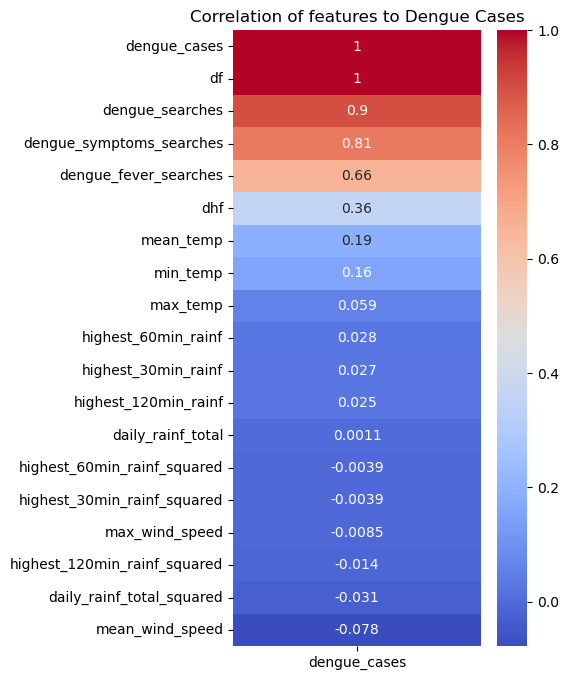

In [43]:
plt.figure(figsize=(4, 8))

heatmap = sns.heatmap(dengue_lagged.corr()[['dengue_cases']].sort_values(by='dengue_cases', ascending=False), annot=True, cmap='coolwarm')

plt.title('Correlation of features to Dengue Cases', fontsize=12)
plt.show()

- The strongest positive correlation is between dengue and dengue searches
- The correlation between dengue and other factors are weak, with the stronger correlation being between dengue and temperature

## Export lagged dataframe for modelling

In [44]:
# Export this dataframe
dengue_lagged.to_csv('../data/dengue_lagged.csv', index=True)

# Save pickle
pickle.dump(dengue_lagged, open('../pkls/dengue_lagged.pkl', 'wb'))